# Multi-text Text Classification Task (Job title Classification by industry )

Given a dataset that has two variables (Job title & Industry) in a csv format of more than 8,500 samples. This dataset is imbalanced (Imbalance means that the number of data points available for different classes is different). I'll build a model using any Machine Learning classifier algorithm to classify job titles by the industry and provide you with insights on how the model works.  
 

# 1 - Packages 

* let's run the cell below to import all the packages that I need during the task.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics

# 2 - Dataset

* I'll a dataset that has two variables (Job title & Industry) in a csv format of more than 8,500 samples. This dataset is imbalanced .

In [2]:
### Load the dataset ###
dataset = pd.read_csv(r"C:\\Users\\SherifMounir\\Desktop\\PythonScripts\\Job titles and industries.csv")

In [16]:
dataset.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [17]:
dataset.shape

(8586, 2)

# 3 - Cleaning the data 

* I'll use regular expression (re) to clean the data . using this pattern "[^A-Za-z]+" , i'll remove all special characters and numbers from the "job title" column in the dataset .

In [7]:
clean_jobs = []
for job in dataset['job title']:
    job = re.sub("[^A-Za-z]+"," ",job)
    clean_jobs.append(job)

df_clean = pd.DataFrame(clean_jobs,columns = ['job title'])
df_clean['industry']= dataset['industry']  

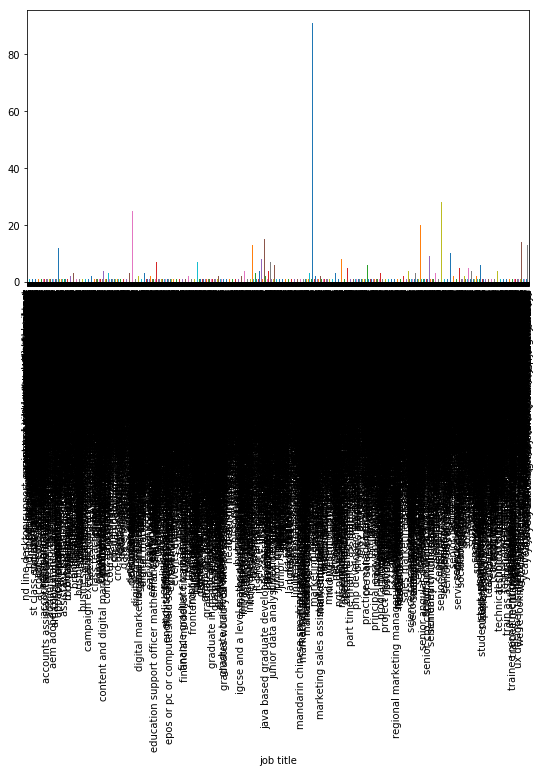

In [8]:
fig1 = plt.figure(figsize=(9,5))
df_clean.groupby('job title').industry.count().plot.bar(ylim=0) ## plot data after cleaning

# 4 - Undersampling for Handling Imbalanced Dataset .

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64


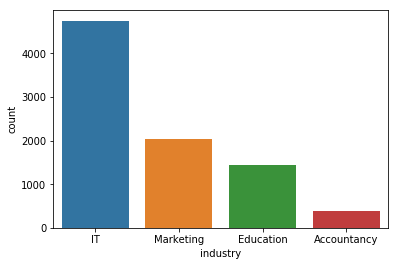

In [19]:
target = 'industry'
ax = sns.countplot(x=target , data=df_clean) ### Dataset before Undersampling
print(df_clean[target].value_counts())
#df_clean.industry.count()

In [21]:
class_Marketing = len(df_clean[df_clean[target] == 'Marketing'])
print(class_Marketing)

2031


In [22]:
class_Education = len(df_clean[df_clean[target] == 'Education'])
print(class_Education)

1435


In [23]:
class_Accountancy = len(df_clean[df_clean[target] == 'Accountancy'])
print(class_Accountancy)

374


In [26]:
sampling_arr = [class_Marketing , class_Education , class_Accountancy]
average = np.mean(sampling_arr)
print(average)

1280.0


In [27]:
majority_class_indicies = df_clean[df_clean[target] == 'IT'].index ## we're going sample from this indicies
print(majority_class_indicies)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981, 5982, 5983],
           dtype='int64', length=4746)


In [29]:
random_majority_indicies = np.random.choice(majority_class_indicies , int(average) , replace = False)
print(len(random_majority_indicies)) # length of class "IT" after Undersampling

1280


In [31]:
Marketing_class_indicies = df_clean[df_clean[target] == 'Marketing'].index 
Education_class_indicies = df_clean[df_clean[target] == 'Education'].index 
Accountancy_class_indicies = df_clean[df_clean[target] == 'Accountancy'].index 

under_sample_indicies = np.concatenate([random_majority_indicies , Marketing_class_indicies , Education_class_indicies , Accountancy_class_indicies ])
under_sampling = df_clean.loc[under_sample_indicies]

Marketing      2031
Education      1435
IT             1280
Accountancy     374
Name: industry, dtype: int64


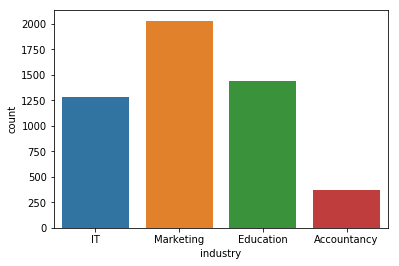

In [33]:
ax = sns.countplot(x=target , data=under_sampling) ### Dataset after Undersampling
print(under_sampling[target].value_counts())

# 5 - Create Fecture Vector

In [34]:
tfidf = TfidfVectorizer(sublinear_tf= True ,
                        min_df = 5 ,
                        norm = 'max' ,
                        ngram_range = (1,2) ,
                        stop_words = 'english')
features = tfidf.fit_transform(under_sampling['job title']).toarray()
print(features.shape)

(5120, 864)


* Split the data to training data and test data

In [35]:
X_train , X_test , Y_train , Y_test = train_test_split(under_sampling['job title'] , under_sampling['industry'] , random_state= 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# 6 - Train data using SVM (Linear Support Vector Machine)

In [36]:
clf = LinearSVC().fit(X_train_tfidf , Y_train)  #Train

* Prediction

In [37]:
y_hat = clf.predict(count_vect.transform(['biology teacher'])) # In which industry that job title belong ?
print(y_hat)

['Education']


In [38]:
Y_predict = clf.predict(count_vect.transform(X_test)) #All Prediction Values now Stored in Y_predict 

# 7 -  Evaluate the Model

In [39]:
print(metrics.classification_report(Y_test , Y_predict ,target_names=under_sampling['industry'].unique()))

              precision    recall  f1-score   support

          IT       0.85      0.91      0.88        88
   Marketing       0.94      0.88      0.91       382
   Education       0.92      0.92      0.92       314
 Accountancy       0.91      0.94      0.92       496

   micro avg       0.91      0.91      0.91      1280
   macro avg       0.90      0.91      0.91      1280
weighted avg       0.92      0.91      0.91      1280

